<a href="https://colab.research.google.com/github/dareoyeleke/python_scripting/blob/main/matplot_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Matplotlib Basics

This notebook gives a quick walkthrough of essential Matplotlib skills—plotting simple charts, customizing visuals, and understanding the core API. The goal is to build familiarity with the fundamentals I'll use in data-driven Python workflows.

## What's Included

- Setting up `matplotlib.pyplot`
- Line plots with labels and titles
- Scatter plots
- Bar charts
- Styling with colors, markers, and line styles
- Adding legends and grid lines
- Saving figures to disk






In [40]:
! pip install datasets
import pandas as pd
from datasets import load_dataset

# Load data for use
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Little bit of data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [41]:
import matplotlib.pyplot as plt
import numpy as np


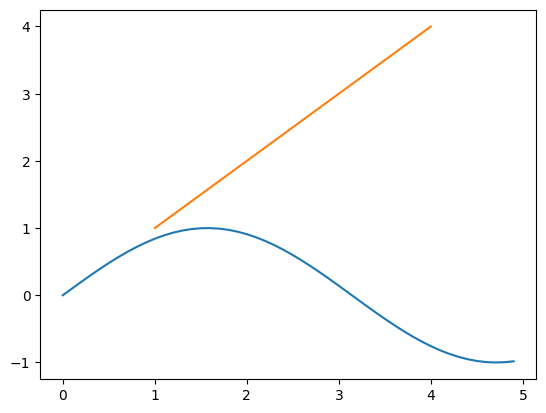

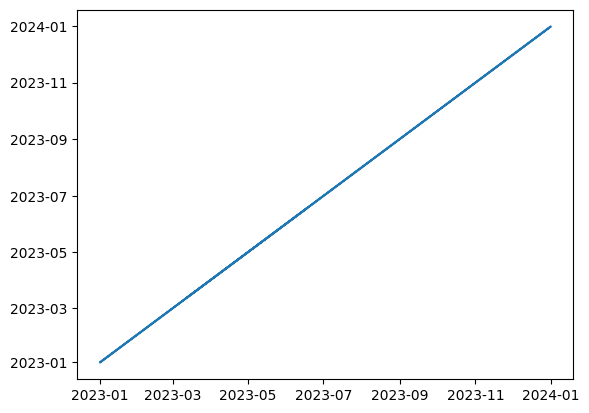

In [50]:
np.arange(10)
# np.arange, as in "a range", prints a range with the values, 0 is default beginning and 1 is default increment, so np.arange(10), print values from 0-9 with increments of 1, beginning and range subject to change

# to test matplot functions
x = np.arange(0, 5, 0.1) # beginning 0, end 5, increment 0.1
y = np.sin(x) # y is sin of values os sin(x)
plt.plot(x,y)

print('\n\n\n')

'''
  To create more visuals, line and bar chart to show data trends, the first (line chart) to show trend of job postings over time,
   the second (bar chart) to show which specific jobs are associated with specific job titles
'''
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x,y) # it plots y versus x values, however it shows some numbers above the visual, to remove the numbers run the next line
plt.show() # to remove the numbers above the visual, in jupyter, it automatically is included

df['job_posted_date'].head(10) # returns the first 5 rows automatically, or the number of rows passed as an argument

# to plot the job posted date, this time against itself first
plt.plot(df['job_posted_date'], df['job_posted_date'])


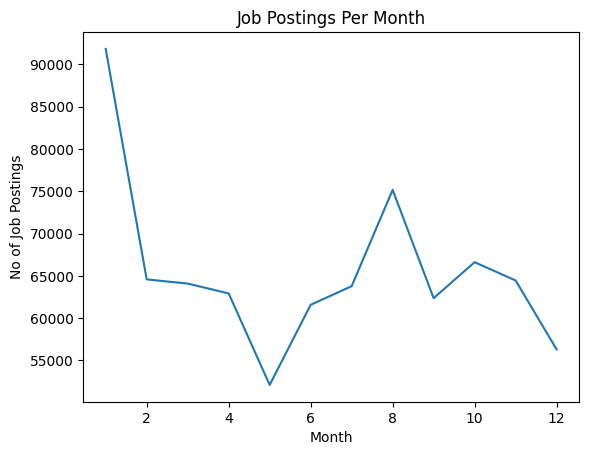

In [44]:
df['job_posted_date'].count() # this gives a count of all the jobs posted, not jobs for per day, for that instead we use

date_counts = df['job_posted_date'].value_counts() # this breaks down the count of how many times a job posted date shows in the table

sorted_dates = date_counts.sort_values(ascending=False) # I couldn't specify job posted date as the sort by because sorted_date isn't a dataframe it's a series and job_posted_date is the index, so it wouldn't be used to sort

sorted_dates = date_counts.sort_index() # since column job_posted_date is the index not a column of values, it has to be sorted as an index

df['job_posted_month'] = df['job_posted_date'].dt.month # to create a column on the trains table with month related to each job posting

df # calling the DataFrame we now see a column job_posted_month dedicated to month specified for each job posting.

monthly_count = df['job_posted_month'].value_counts() # gives a total of values for each row every month has


monthly_count = monthly_count.sort_index() # this actually uses the months as an index, and then sorts them according to index automatically descending i.e from 1-12. Now to plot
monthly_count

# now to plot the job postings per month i.e count for job_posted_month, we plot it againt the index i.e
plt.plot(monthly_count.index, monthly_count.values) # here the index is the values of the month itself since monthly_count is an index, and the monthly_count is a series with the only actual values as the count
plt.title('Job Postings Per Month')
plt.ylabel('No of Job Postings')
plt.xlabel('Month')
plt.show()

In [45]:
# series for pandas, basically a 1-dim array like in Numpy, is a column of data in a DataFrame
leke_siblings =  pd.Series([35, 33, 31, 30, 26], index = ['first', 'second', 'third', 'fourth', 'fifth']) # creating a series for me and my siblings ages according to our positions of birth
leke_siblings

leke_siblings.index # prints out our birth positions
leke_siblings.values # prints out our ages as an array

array([35, 33, 31, 30, 26])

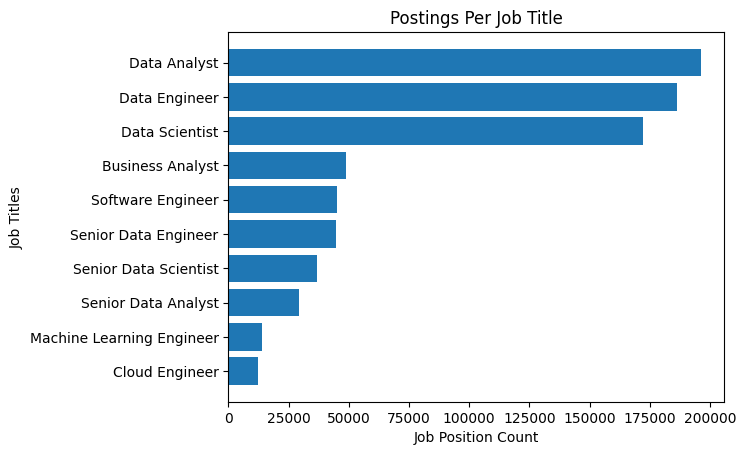

In [46]:
# Horizontal Bar chat creation with Pandas for Count of Job Postings for every Job title, i.e all 8 job titles and their counts
job_position_count = df['job_title_short'].value_counts() # to create a series of the job_title_short column, with counts as the only values
job_position_count = job_position_count.sort_values(ascending = True) # organizing the values in ascending order so the chart prints from low to high
job_position_count # prints out how many job postings the different 8 job positions have



plt.barh( job_position_count.index, job_position_count.values ) # .pltbarh, prints an horizontal bar chart and value y comes first, and then x unlike plt.bar where its typical (x,y)
plt.title('Postings Per Job Title') # another stateful approach, has to be under or on top visual to apply to visual, else it creates a new empty visual titled whatever is passed as an argument
plt.ylabel('Job Titles') # another stateful approach applied to the visual above for labelling y axis
plt.xlabel('Job Position Count')
plt.show() # to show function without extra data type on top visual, plt.show, .legend,.title, xlabel(), .ylabel() are called stateful approch in matplot, which means they're not even stored in an object, they just apply to the visual




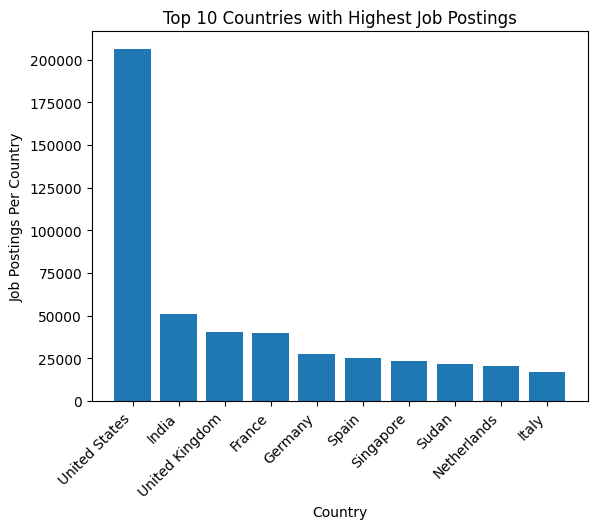

In [47]:
# Creating a Bar chart for top 10 Countries with highest Job Postings

job_country_count = df['job_country'].value_counts() # To give all Countries and the number of Job postings associated with them
top_job_countrycount = job_country_count.head(10) # aSince there are 160 rows and probably too many to fit into a chart effectively, I'll limit it to 10
top_job_countrycount # Here job_country i.e (top_job_countrycount.index) is the index and count is the .values(). Important for plotting

plt.bar(top_job_countrycount.index, top_job_countrycount) # however it is printed with all the values at the bottom unreadable, to fix that we use a stateful approach below
plt.xticks(rotation = 45, ha='right') # this stateful approach is used to make the x labels more readable by rotating the values at an angle, ha(horizontal alignment) set to right moves the tick right  of the values
plt.title('Top 10 Countries with Highest Job Postings') # Graph Title Approach
plt.ylabel('Job Postings Per Country') # Y axis Label
plt.xlabel('Country') # X axis Label
plt.show()




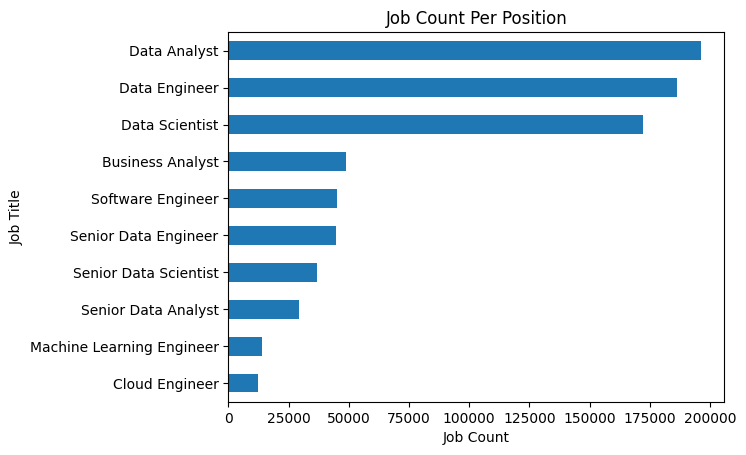

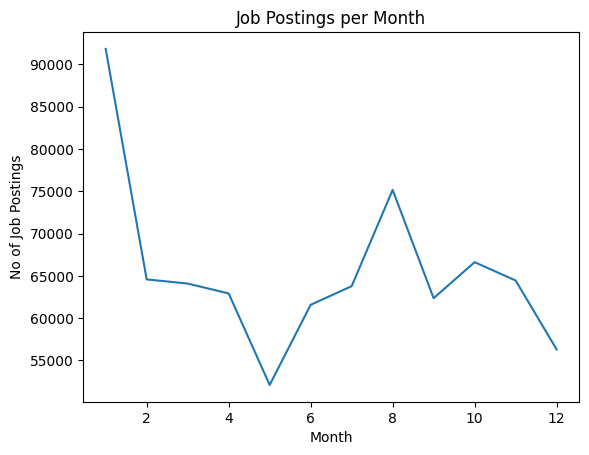

In [48]:
# Alternatively using pandas, we can easily plot certain basic visuals as below

job_position_count.plot(kind = 'barh') # Gives an instant Horizontal bar chart with the values in the object job_position_count in one line
plt.title('Job Count Per Position')
plt.ylabel('Job Title')
plt.xlabel('Job Count')
plt.show() # Even though .plot is a pandas method, statefule approches can still be applied to the visual as like using matplot.plt. NOTE: other stateful approaches related to visual has to be applied before show to apply to visual

print('\n\n\n') # to make the results more readable

# We can also plot the line chart from before
monthly_count.plot(kind = 'line')
plt.title('Job Postings per Month')
plt.ylabel('No of Job Postings')
plt.xlabel('Month')
plt.show()


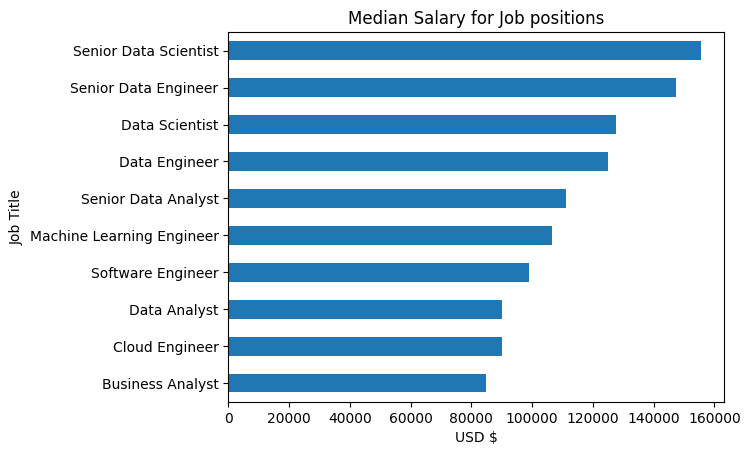

In [49]:
# Viewing the job market and calculating the median, not mean salary as median salaries offer a realistic middle ground unaffected by skills and then putting the values in a barh (Horizontal bar chart)
job_position_median = df.groupby('job_title_short')['salary_year_avg'].median().sort_values() # including a sort_values method to give the data some order for the visual

#job_position_median = job_position_median.sort_values(ascending=True)

job_position_median.plot(kind = 'barh') # using the .plot() method for easy visual creation with pandas
plt.title('Median Salary for Job positions')
plt.ylabel('Job Title')
plt.xlabel('USD $')
plt.show()